# LOCAL SEARCH - ANÁLISE DE RESULTADOS

 - ITA | PG-CTE-S | TE-282 - Meta-heurísticas
 - Professor Dr. Angelo Passaro
 - Aluno: Rafael Caneiro de Oliveira
 - Versao: 0.1
 - Data: 26/10/2021

## Bibliotecas | Parâmetros | Funções

In [264]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
from ast import literal_eval

PATH = Path.cwd().parent
RAW_PATH = Path(PATH, "./data/raw/") 
LOG_PATH = Path(PATH, "./data/log/")
print(LOG_PATH)


/Users/rco/github/s_metaheuristic/data/log


In [265]:
def read_port_files(n_port):
    filepath = Path(RAW_PATH, 'port' + str(n_port) + '.txt')
    with open(filepath) as fp:
        # quantidade de ativos no portfolio
        n_assets = int(fp.readline())
        # armazena as estatisticas do ativo
        r_mean = []
        r_std = []
        for n in range(n_assets):
            line = fp.readline()
            r_mean.append(float(line.strip().split()[0]))
            r_std.append(float(line.strip().split()[1]))

        # obtem o restante da matriz de covariancia
        cnt = 32
        i = []
        j = []
        cov = []
        line = fp.readline()
        while line:
            i.append(int(line.strip().split(' ')[0]))
            j.append(int(line.strip().split(' ')[1]))
            cov.append(float(line.strip().split(' ')[2]))
            line = fp.readline()
    fp.close()
    # retorna dataframe com estatisticas dos ativos do portfolio
    df_stats = pd.DataFrame({'port':n_port,
                             'i':[i_+1 for i_ in range(n_assets)],
                             'r_mean':r_mean,
                             'r_std':r_std})
    print(df_stats.shape)

    # retorna dataframe com matriz de covariancia dos ativos do portfolio
    df_cov_mx = pd.DataFrame({'port':n_port,
                             'i':i,
                             'j':j,
                             'cov':cov})
    print(df_cov_mx.shape)
    return df_stats, df_cov_mx

## Carrega Dados

In [266]:
df_stats_list = []
df_cov_mx_list =[]
for p in range(1,6,1):
    df_stats, df_cov_mx = read_port_files(p)
    df_stats_list.append(df_stats)
    df_cov_mx_list.append(df_cov_mx)
    
df_stats = pd.concat(df_stats_list)
df_cov_mx = pd.concat(df_cov_mx_list)

(31, 4)
(496, 4)
(85, 4)
(3655, 4)
(89, 4)
(4005, 4)
(98, 4)
(4851, 4)
(225, 4)
(25425, 4)


In [267]:
portfolios = {
    1:'Hang Seng - Hong Kong',
    2:'DAX - German Blue Chips',
    3:'FTSE - London',
    4:"S&P - Standard and Poor's 500 - US",
    5:'Nikkei - Tokyo'
}
df_stats['portfolio'] = df_stats.port.map(portfolios)
df_cov_mx['portfolio'] = df_cov_mx.port.map(portfolios)

In [268]:
uefs = []
for port in range(5):
    uef = pd.read_csv(Path(RAW_PATH, 'portef' + str(port+1) + '.txt'), header=None, sep='\s+')
    uef.columns = ['mean_return', 'var_return']
    uef['port'] = port + 1
    uefs.append(uef)
uef = pd.concat(uefs, ignore_index=True).reset_index(drop=True)
uef['portfolio'] = uef.port.map(portfolios)
uef.head()

,mean_return,var_return,port,portfolio
0,0.010865,0.004776,1,Hang Seng - Hong Kong
1,0.010861,0.004768,1,Hang Seng - Hong Kong
2,0.010857,0.004760,1,Hang Seng - Hong Kong
3,0.010853,0.004752,1,Hang Seng - Hong Kong
4,0.010849,0.004745,1,Hang Seng - Hong Kong


In [269]:
all_dfs = []
best_dfs = []
LOGs = str(LOG_PATH) + '/*.csv'

c = 0
for file in glob.glob(str(LOGs)):
    filename = file[file.find('/log/')+5:]
    try:
        df = pd.read_csv(file, low_memory=False, sep=',', quotechar='"')
        c = c + 1
    except:
        print('Arquivo não importado: {}'.format(filename))
    df['filename'] = filename
    df['X'] = df.X.str[1:-1].str.split().apply(lambda x: [float(y) for y in x])
    df['Z'] = df.Z.str[1:-1].str.split().apply(lambda x: [float(y) for y in x])
    df['Q'] = df.Z.apply(lambda x: np.sum(np.array(x)))
    all_dfs.append(df)
    best_dfs.append(df.iloc[-1:])

all_data = pd.concat(all_dfs, ignore_index=True).reset_index(drop=True)
all_data.rename({'move_strategy':'move_str',
                 'selection_strategy':'selec_str'}, axis=1, inplace=True)

best_data = pd.concat(best_dfs, ignore_index=True).reset_index(drop=True)
best_data.rename({'move_strategy':'move_str',
                  'selection_strategy':'selec_str'}, axis=1, inplace=True)

print('Importados {} arquivos'.format(c))

all_data.head()


Importados 1 arquivos


,iter,obj,aug_obj,return,X,Z,max_iter,neighbours,alpha,exp_return,n_port,k,move_str,seed,selec_str,filename,Q
0,0,0.177946,0.177946,0.003473,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.314...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.0015,1,7,best,42,best,log_gls_20211115_212519_248398.csv,7.0
1,1,0.110622,0.110622,0.002920,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.161...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.0015,1,7,best,42,best,log_gls_20211115_212519_248398.csv,7.0
2,2,0.106166,0.106166,0.002892,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.153...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.0015,1,7,best,42,best,log_gls_20211115_212519_248398.csv,7.0
3,3,0.101646,0.101646,0.002864,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.145...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.0015,1,7,best,42,best,log_gls_20211115_212519_248398.csv,7.0
4,4,0.074132,0.074132,0.002703,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.101...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.0015,1,7,best,42,best,log_gls_20211115_212519_248398.csv,7.0


In [270]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iter        5300 non-null   int64  
 1   obj         5300 non-null   float64
 2   aug_obj     5300 non-null   float64
 3   return      5300 non-null   float64
 4   X           5300 non-null   object 
 5   Z           5300 non-null   object 
 6   max_iter    5300 non-null   int64  
 7   neighbours  5300 non-null   int64  
 8   alpha       5300 non-null   float64
 9   exp_return  5300 non-null   float64
 10  n_port      5300 non-null   int64  
 11  k           5300 non-null   int64  
 12  move_str    5300 non-null   object 
 13  seed        5300 non-null   int64  
 14  selec_str   5300 non-null   object 
 15  filename    5300 non-null   object 
 16  Q           5300 non-null   float64
dtypes: float64(6), int64(6), object(5)
memory usage: 704.0+ KB


In [271]:
all_data.iter.value_counts()

0     53
63    53
73    53
72    53
71    53
70    53
69    53
68    53
67    53
66    53
65    53
64    53
62    53
1     53
61    53
60    53
59    53
58    53
57    53
56    53
55    53
54    53
53    53
52    53
74    53
75    53
76    53
77    53
98    53
97    53
96    53
95    53
94    53
93    53
92    53
91    53
90    53
89    53
88    53
87    53
86    53
85    53
84    53
83    53
82    53
81    53
80    53
79    53
78    53
51    53
50    53
49    53
24    53
22    53
21    53
20    53
19    53
18    53
17    53
16    53
15    53
14    53
13    53
12    53
11    53
10    53
9     53
8     53
7     53
6     53
5     53
4     53
3     53
2     53
23    53
25    53
48    53
26    53
47    53
46    53
45    53
44    53
43    53
42    53
41    53
40    53
39    53
38    53
37    53
36    53
35    53
34    53
33    53
32    53
31    53
30    53
29    53
28    53
27    53
99    53
Name: iter, dtype: int64

## Portfólios

### Geral

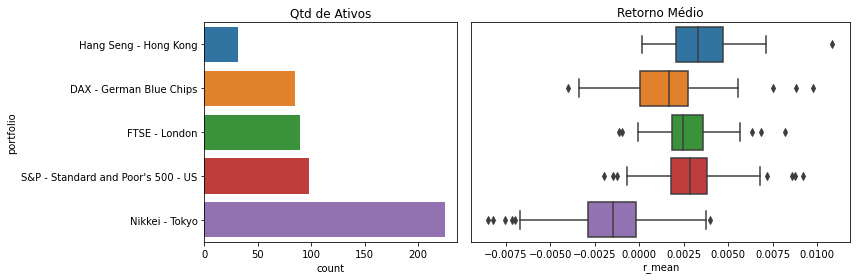

In [272]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios': [1, 1.5]})
sns.countplot(data=df_stats, y='portfolio', ax=ax[0])
ax[0].title.set_text('Qtd de Ativos')
sns.boxplot(data=df_stats, y='portfolio', x='r_mean', ax=ax[1])
ax[1].title.set_text("Retorno Médio")
ax[1].get_yaxis().set_ticks([])
ax[1].set_ylabel('')
fig.tight_layout()

### Matriz de Covariância

In [273]:
df_cov_mx[df_cov_mx.i!=df_cov_mx.j].describe().T

,count,mean,std,min,25%,50%,75%,max
port,37904.0,4.336350,1.068738,1.000000,4.000000,5.000000,5.00000,5.000000
i,37904.0,60.152728,49.736086,1.000000,20.000000,46.000000,88.00000,224.000000
j,37904.0,120.305456,62.150969,2.000000,68.000000,113.000000,178.00000,225.000000
cov,37904.0,0.388782,0.166550,-0.145815,0.258983,0.419793,0.51717,0.909412


<AxesSubplot:>

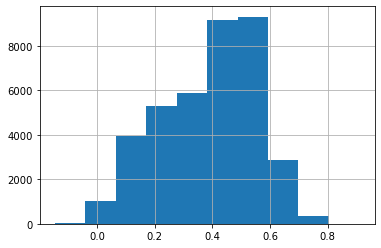

In [274]:
df_cov_mx[df_cov_mx.i!=df_cov_mx.j]['cov'].hist()

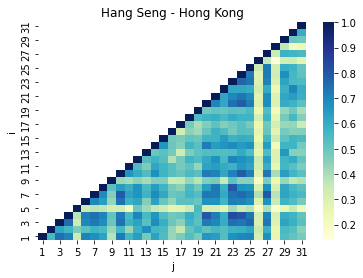

In [275]:
portfolio = 1
df_cov_pivot = df_cov_mx[df_cov_mx.port==portfolio].pivot(index='i', columns='j', values='cov')
sns.heatmap(df_cov_pivot.iloc[::-1], cmap="YlGnBu") 
plt.title(portfolios[portfolio])
ax=ax

### Fronteiras de Eficiência Irrestrira - UEF

In [276]:
uef.head()

,mean_return,var_return,port,portfolio
0,0.010865,0.004776,1,Hang Seng - Hong Kong
1,0.010861,0.004768,1,Hang Seng - Hong Kong
2,0.010857,0.004760,1,Hang Seng - Hong Kong
3,0.010853,0.004752,1,Hang Seng - Hong Kong
4,0.010849,0.004745,1,Hang Seng - Hong Kong


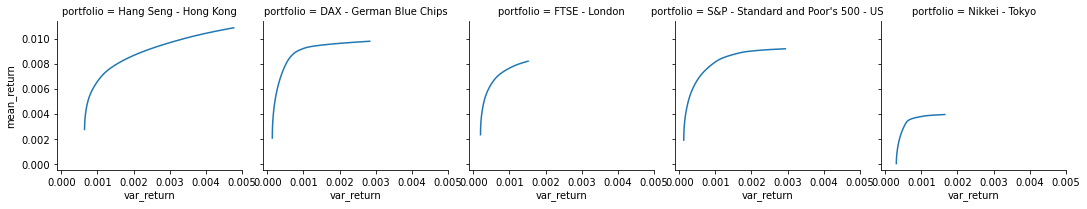

In [277]:
g = sns.relplot(data=uef, y='mean_return', x='var_return', col='portfolio', kind='line', height=3)
ax=ax

## Curvas de Aprendizado

### Avaliação do Impacto da Seed

In [278]:
all_data

,iter,obj,aug_obj,return,X,Z,max_iter,neighbours,alpha,exp_return,n_port,k,move_str,seed,selec_str,filename,Q
0,0,0.177946,0.177946,0.003473,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.314...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.0015,1,7,best,42,best,log_gls_20211115_212519_248398.csv,7.0
1,1,0.110622,0.110622,0.002920,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.161...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.0015,1,7,best,42,best,log_gls_20211115_212519_248398.csv,7.0
2,2,0.106166,0.106166,0.002892,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.153...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.0015,1,7,best,42,best,log_gls_20211115_212519_248398.csv,7.0
3,3,0.101646,0.101646,0.002864,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.145...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.0015,1,7,best,42,best,log_gls_20211115_212519_248398.csv,7.0
4,4,0.074132,0.074132,0.002703,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.101...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.0015,1,7,best,42,best,log_gls_20211115_212519_248398.csv,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,95,0.044162,0.044162,0.003005,"[0.011064, 0.0, 0.0, 0.0, 0.022857, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.0030,1,10,best,42,best,log_gls_20211115_212519_248398.csv,10.0
5296,96,0.043693,0.043693,0.003017,"[0.0, 0.0, 0.0, 0.0, 0.022881, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.0030,1,10,best,42,best,log_gls_20211115_212519_248398.csv,10.0
5297,97,0.043236,0.043236,0.003003,"[0.0, 0.0, 0.0, 0.0, 0.023068, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.0030,1,10,best,42,best,log_gls_20211115_212519_248398.csv,10.0
5298,98,0.042992,0.042992,0.003006,"[0.0, 0.0, 0.0, 0.0, 0.023095, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.0030,1,10,best,42,best,log_gls_20211115_212519_248398.csv,10.0


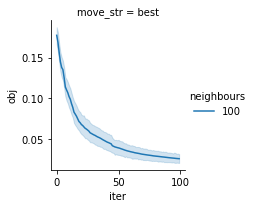

In [279]:
g = sns.FacetGrid(
    data=all_data, col='move_str', hue='neighbours')
g.map(sns.lineplot, 'iter', 'obj')
g.add_legend()
g=g

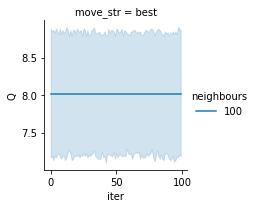

In [280]:
g = sns.FacetGrid(
    data=all_data, col='move_str', hue='neighbours')
g.map(sns.lineplot, 'iter', 'Q')
g.add_legend()
g=g

In [281]:
# g = sns.FacetGrid(
#     data=all_data, row='seed', col='selec_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

### Avaliação do Tipo de Move

In [282]:
# g = sns.FacetGrid(
#     data=all_data, row='selec_str', col='move_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

### Avaliação do Impacto do Retorno Experado

In [283]:
# g = sns.FacetGrid(
#     data=all_data, row='exp_return', col='move_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

## Análise Best - Portfólio 1

In [284]:
df_stats[df_stats.port==1].describe().T

,count,mean,std,min,25%,50%,75%,max
port,31.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
i,31.0,16.000000,9.092121,1.000000,8.500000,16.000000,23.500000,31.000000
r_mean,31.0,0.003504,0.002186,0.000141,0.002043,0.003286,0.004725,0.010865
r_std,31.0,0.045723,0.007296,0.035848,0.040043,0.045450,0.050112,0.069105


In [285]:
print(best_data.shape)
best_data.head()

(1, 17)


,iter,obj,aug_obj,return,X,Z,max_iter,neighbours,alpha,exp_return,n_port,k,move_str,seed,selec_str,filename,Q
0,99,0.04256,0.04256,0.003003,"[0.0, 0.0, 0.0, 0.0, 0.02314, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",100,100,0.1,0.003,1,10,best,42,best,log_gls_20211115_212519_248398.csv,10.0


In [286]:
best_data.describe().T

,count,mean,std,min,25%,50%,75%,max
iter,1.0,99.000000,NaN,99.000000,99.000000,99.000000,99.000000,99.000000
obj,1.0,0.042560,NaN,0.042560,0.042560,0.042560,0.042560,0.042560
aug_obj,1.0,0.042560,NaN,0.042560,0.042560,0.042560,0.042560,0.042560
return,1.0,0.003003,NaN,0.003003,0.003003,0.003003,0.003003,0.003003
max_iter,1.0,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000
neighbours,1.0,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000
alpha,1.0,0.100000,NaN,0.100000,0.100000,0.100000,0.100000,0.100000
exp_return,1.0,0.003000,NaN,0.003000,0.003000,0.003000,0.003000,0.003000
n_port,1.0,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
k,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000


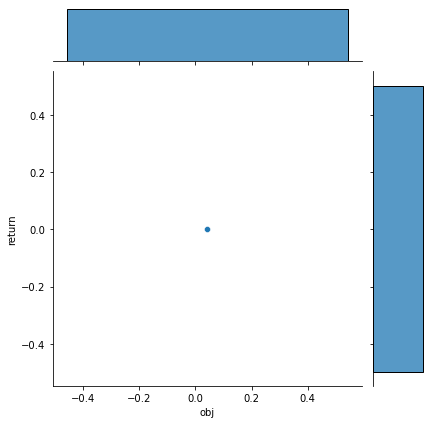

In [287]:
sns.jointplot(data=best_data, x='obj', y='return', palette='bright')

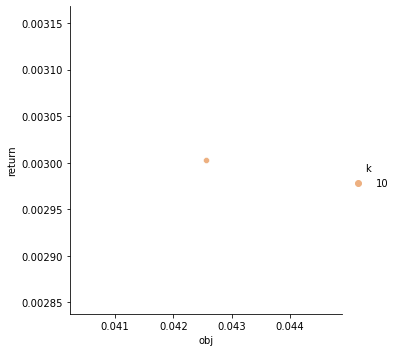

In [288]:
sns.relplot(data=best_data, x='obj', y='return', hue='k', palette='flare')

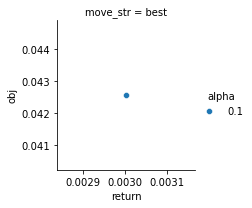

In [289]:
g = sns.FacetGrid(data=best_data, col='move_str', hue='alpha')
g.map(sns.scatterplot, 'return', 'obj')
g.add_legend()
g=g

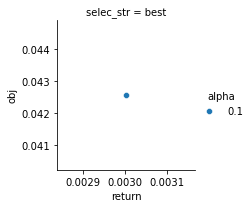

In [290]:
g = sns.FacetGrid(data=best_data, col='selec_str', hue='alpha')
g.map(sns.scatterplot, 'return', 'obj')
g.add_legend()
g=g

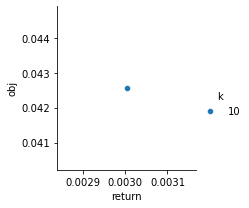

In [291]:
g = sns.FacetGrid(data=best_data, hue='k')
g.map(sns.scatterplot, 'return', 'obj')
g.add_legend()
g=g

In [292]:
best_data.describe().T

,count,mean,std,min,25%,50%,75%,max
iter,1.0,99.000000,NaN,99.000000,99.000000,99.000000,99.000000,99.000000
obj,1.0,0.042560,NaN,0.042560,0.042560,0.042560,0.042560,0.042560
aug_obj,1.0,0.042560,NaN,0.042560,0.042560,0.042560,0.042560,0.042560
return,1.0,0.003003,NaN,0.003003,0.003003,0.003003,0.003003,0.003003
max_iter,1.0,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000
neighbours,1.0,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000
alpha,1.0,0.100000,NaN,0.100000,0.100000,0.100000,0.100000,0.100000
exp_return,1.0,0.003000,NaN,0.003000,0.003000,0.003000,0.003000,0.003000
n_port,1.0,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
k,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000


In [293]:
df_stats[df_stats.port==1].describe().T

,count,mean,std,min,25%,50%,75%,max
port,31.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
i,31.0,16.000000,9.092121,1.000000,8.500000,16.000000,23.500000,31.000000
r_mean,31.0,0.003504,0.002186,0.000141,0.002043,0.003286,0.004725,0.010865
r_std,31.0,0.045723,0.007296,0.035848,0.040043,0.045450,0.050112,0.069105


In [294]:
uef[uef.port==1].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_return,2000.0,0.006825,0.002334,0.002784,0.004804,0.006825,0.008845,0.010865
var_return,2000.0,0.001579,0.001116,0.000642,0.000716,0.001058,0.002150,0.004776
port,2000.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'mean_return')

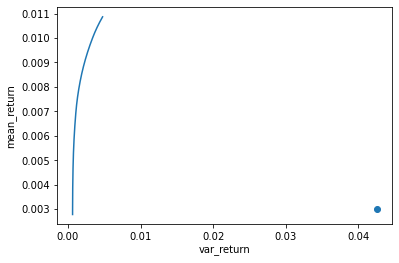

In [295]:
data = best_data[best_data['obj']<0.05]
plt.plot(uef[uef.port==1].var_return, uef[uef.port==1].mean_return)
plt.scatter(data.obj, data['return'])
plt.xlabel("var_return")
plt.ylabel("mean_return")

Text(0, 0.5, 'mean_return')

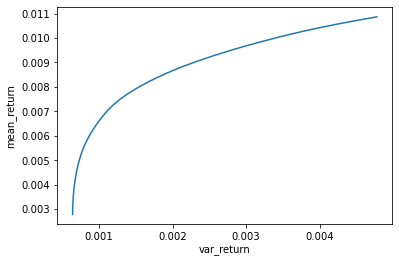

In [296]:
data = best_data[best_data['obj']<0.005]
plt.plot(uef[uef.port==1].var_return, uef[uef.port==1].mean_return)
plt.scatter(data.obj, data['return'])
plt.xlabel("var_return")
plt.ylabel("mean_return")

In [297]:
best_data.groupby(['exp_return', 'move_str', 'selec_str'], as_index=False)['obj']\
    .count()\
    .pivot(index=['move_str', 'selec_str'], columns='exp_return', values='obj')

,exp_return,0.003
move_str,selec_str,
best,best,1


In [298]:
best_data.groupby(['exp_return', 'move_str', 'selec_str'], as_index=False)['obj']\
    .min()\
    .pivot(index=['move_str', 'selec_str'], columns='exp_return', values='obj')

,exp_return,0.003
move_str,selec_str,
best,best,0.04256


In [299]:
best_best_data = best_data.groupby(['exp_return'], as_index=False)['obj'].min()
print(best_best_data.shape)
best_best_data.head()

(1, 2)


,exp_return,obj
0,0.003,0.04256


In [303]:
for x in all_data.X.values:
    print(*x, sep=' ')

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.3142703 0.072251 0.0 0.0 0.0 0.0 0.0 0.104101 0.0 0.160561 0.0 0.0 0.0 0.0 0.0 0.1166967 0.0 0.0 0.0 0.051524 0.0 0.180594 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.16129 0.037081 0.0 0.0 0.0 0.0 0.0 0.053427 0.0 0.082403 0.0 0.0 0.0 0.0 0.0 0.059891 0.0 0.0 0.0 0.513222 0.0 0.092685 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.153416 0.035271 0.0 0.0 0.0 0.0 0.0 0.050819 0.0 0.07838 0.0 0.0 0.0 0.0 0.0 0.056967 0.0 0.0 0.0 0.536985 0.0 0.08816 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.145598 0.033474 0.0 0.0 0.0 0.0 0.0 0.048229 0.0 0.074386 0.0 0.0 0.0 0.0 0.0 0.054064 0.0 0.0 0.0 0.560582 0.0 0.083667 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.101151 0.023255 0.0 0.0 0.0 0.0 0.0 0.033506 0.0 0.051678 0.0 0.0 0.0 0.0 0.0 0.03756 0.0 0.0 0.0 0.694725 0.0 0.058126 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0910359 0.023255 0.0 0.0 0.0 0.0 0.0 0.033506 0.0 0.051678 0.0 0.0 0.0 0.0 0.0 0.03756 0.0 0.0 0.0 0.7048401 0.0 0.058126 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.085042 0.0217

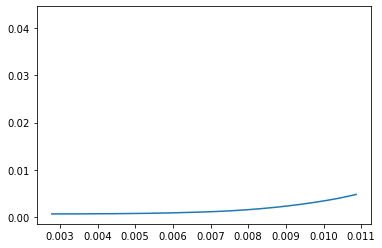

In [301]:
plt.plot(uef[uef.port==1].mean_return, uef[uef.port==1].var_return)
plt.plot(best_best_data.exp_return, best_best_data.obj)